In [ ]:
# !pip install tweetfeels

In [ ]:
# import nltk
# nltk.download('vader_lexicon')

In [5]:
from tweetfeels import TweetFeels
from threading import Thread
import time
import pandas as pd
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [6]:
go_on = True

In [7]:
consumer_key = '**************'
consumer_secret = '****************'
access_token = '*******************'
access_token_secret = '**********************'
login = [consumer_key, consumer_secret, access_token, access_token_secret]

In [8]:
def print_feels(seconds=10):
    while go_on:
        time.sleep(seconds)
        print(f'[{time.ctime()}] Sentiment Score: {modi_feels.sentiment.value}')

In [9]:
modi_feels = TweetFeels(login, tracking=['modi'])
t1 = Thread(target=print_feels)
modi_feels.start()
t1.start()

[Mon Feb 25 22:19:26 2019] Sentiment Score: -0.0027871960087037253
[Mon Feb 25 22:19:36 2019] Sentiment Score: -0.005137065621366475
[Mon Feb 25 22:19:48 2019] Sentiment Score: -0.0003291572923391599
[Mon Feb 25 22:19:58 2019] Sentiment Score: -0.0016149869713634522
[Mon Feb 25 22:20:10 2019] Sentiment Score: -0.005310542284763782
[Mon Feb 25 22:20:21 2019] Sentiment Score: -0.005518433717887901
[Mon Feb 25 22:20:31 2019] Sentiment Score: -0.0019411366212546332
[Mon Feb 25 22:20:42 2019] Sentiment Score: -0.0011253728859507452
[Mon Feb 25 22:20:52 2019] Sentiment Score: -0.0012558489089760914
[Mon Feb 25 22:21:03 2019] Sentiment Score: -0.004847332178698157
[Mon Feb 25 22:21:13 2019] Sentiment Score: -0.004847332178698157
[Mon Feb 25 22:21:23 2019] Sentiment Score: -0.00670681701436112
[Mon Feb 25 22:21:34 2019] Sentiment Score: -0.0067126832301814664
[Mon Feb 25 22:21:44 2019] Sentiment Score: -0.006710362053883715
[Mon Feb 25 22:21:55 2019] Sentiment Score: -0.006474955945685239
[Mon

[Mon Feb 25 22:23:17 2019] Sentiment Score: -0.015285468746088327


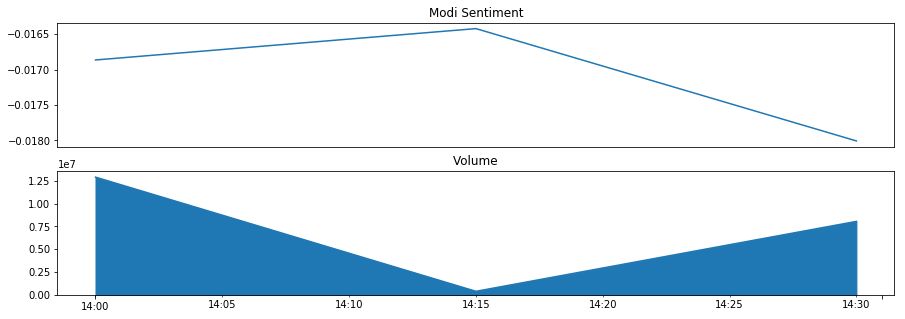

[Mon Feb 25 22:23:29 2019] Sentiment Score: -0.003828876652354276
[Mon Feb 25 22:23:39 2019] Sentiment Score: -0.005378502644392759
[Mon Feb 25 22:23:50 2019] Sentiment Score: -0.0027733929575918742


In [11]:
data1 = {s.end: s.value for s in modi_feels.sentiments(delta_time=timedelta(minutes=15), nans=True)}
data2 = {s.end: s.volume for s in modi_feels.sentiments(delta_time=timedelta(minutes=15), nans=True)}
df1 = pd.DataFrame.from_dict(data1, orient='index')
df2 = pd.DataFrame.from_dict(data2, orient='index')
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(15, 5)
plt.subplot(211).axes.get_xaxis().set_visible(False)
df1[0].plot(kind='line', title='Modi Sentiment')
plt.subplot(212)
df2[0].plot(kind='area', title='Volume')

In [13]:
modi_feels.stop()

[Mon Feb 25 22:24:00 2019] Sentiment Score: -0.0027733929575918742
